<a href="https://colab.research.google.com/github/Ware-Hard-or-Soft/ML-DL-projects/blob/main/Adversarially_trained_autoencoder_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder  





Author: David Zheng

---




A `discriminator` network maps images of shape (32, 32, 3) to a binary score estimating the probability that the image is real.
A `gan` network chains the generator and the discriminator together: `gan(x) = discriminator(autoencoder(x))`. Thus this `gan` network maps
latent space vectors to the discriminator's assessment of the realism of these latent vectors as decoded by the generator.

We train the autoencoder using a weighted sum of the mse loss and binary cross entropy on the output of the discriminator.

Leaky ReLU is chosen over standard ReLU in your autoencoder to address the dying ReLU problem and potentially improve the autoencoder's training and performance. It helps ensure that neurons remain active and can continue learning, even when their inputs are negative.



## The autoencoder
 compare the results of training with mse versus training with mse plus adversarial loss.

In [1]:
import keras
from keras import layers
import numpy as np

latent_dim = 32
height = 32
width = 32
channels = 3

img_input = keras.Input(shape=(height, width, channels))

# NN to connect img_input to img_output
#ENCODER
x = layers.Conv2D(128, 3)(img_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(32)(x)


#DECODER
x = layers.Dense(128 * 16 * 16)(x)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Dense(3, activation='sigmoid')(x)

autoencoder = keras.models.Model(img_input, x)
autoencoder.summary()
autoencoder.compile(optimizer='rmsprop', loss='mse')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32768)               │       1,081,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 32, 32, 256)         │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32, 32, 3)           │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,626,019 (13.83 MB)

 Trainable params: 3,626,019 (13.83 MB)

 Non-trainable params: 0 (0.00 B)

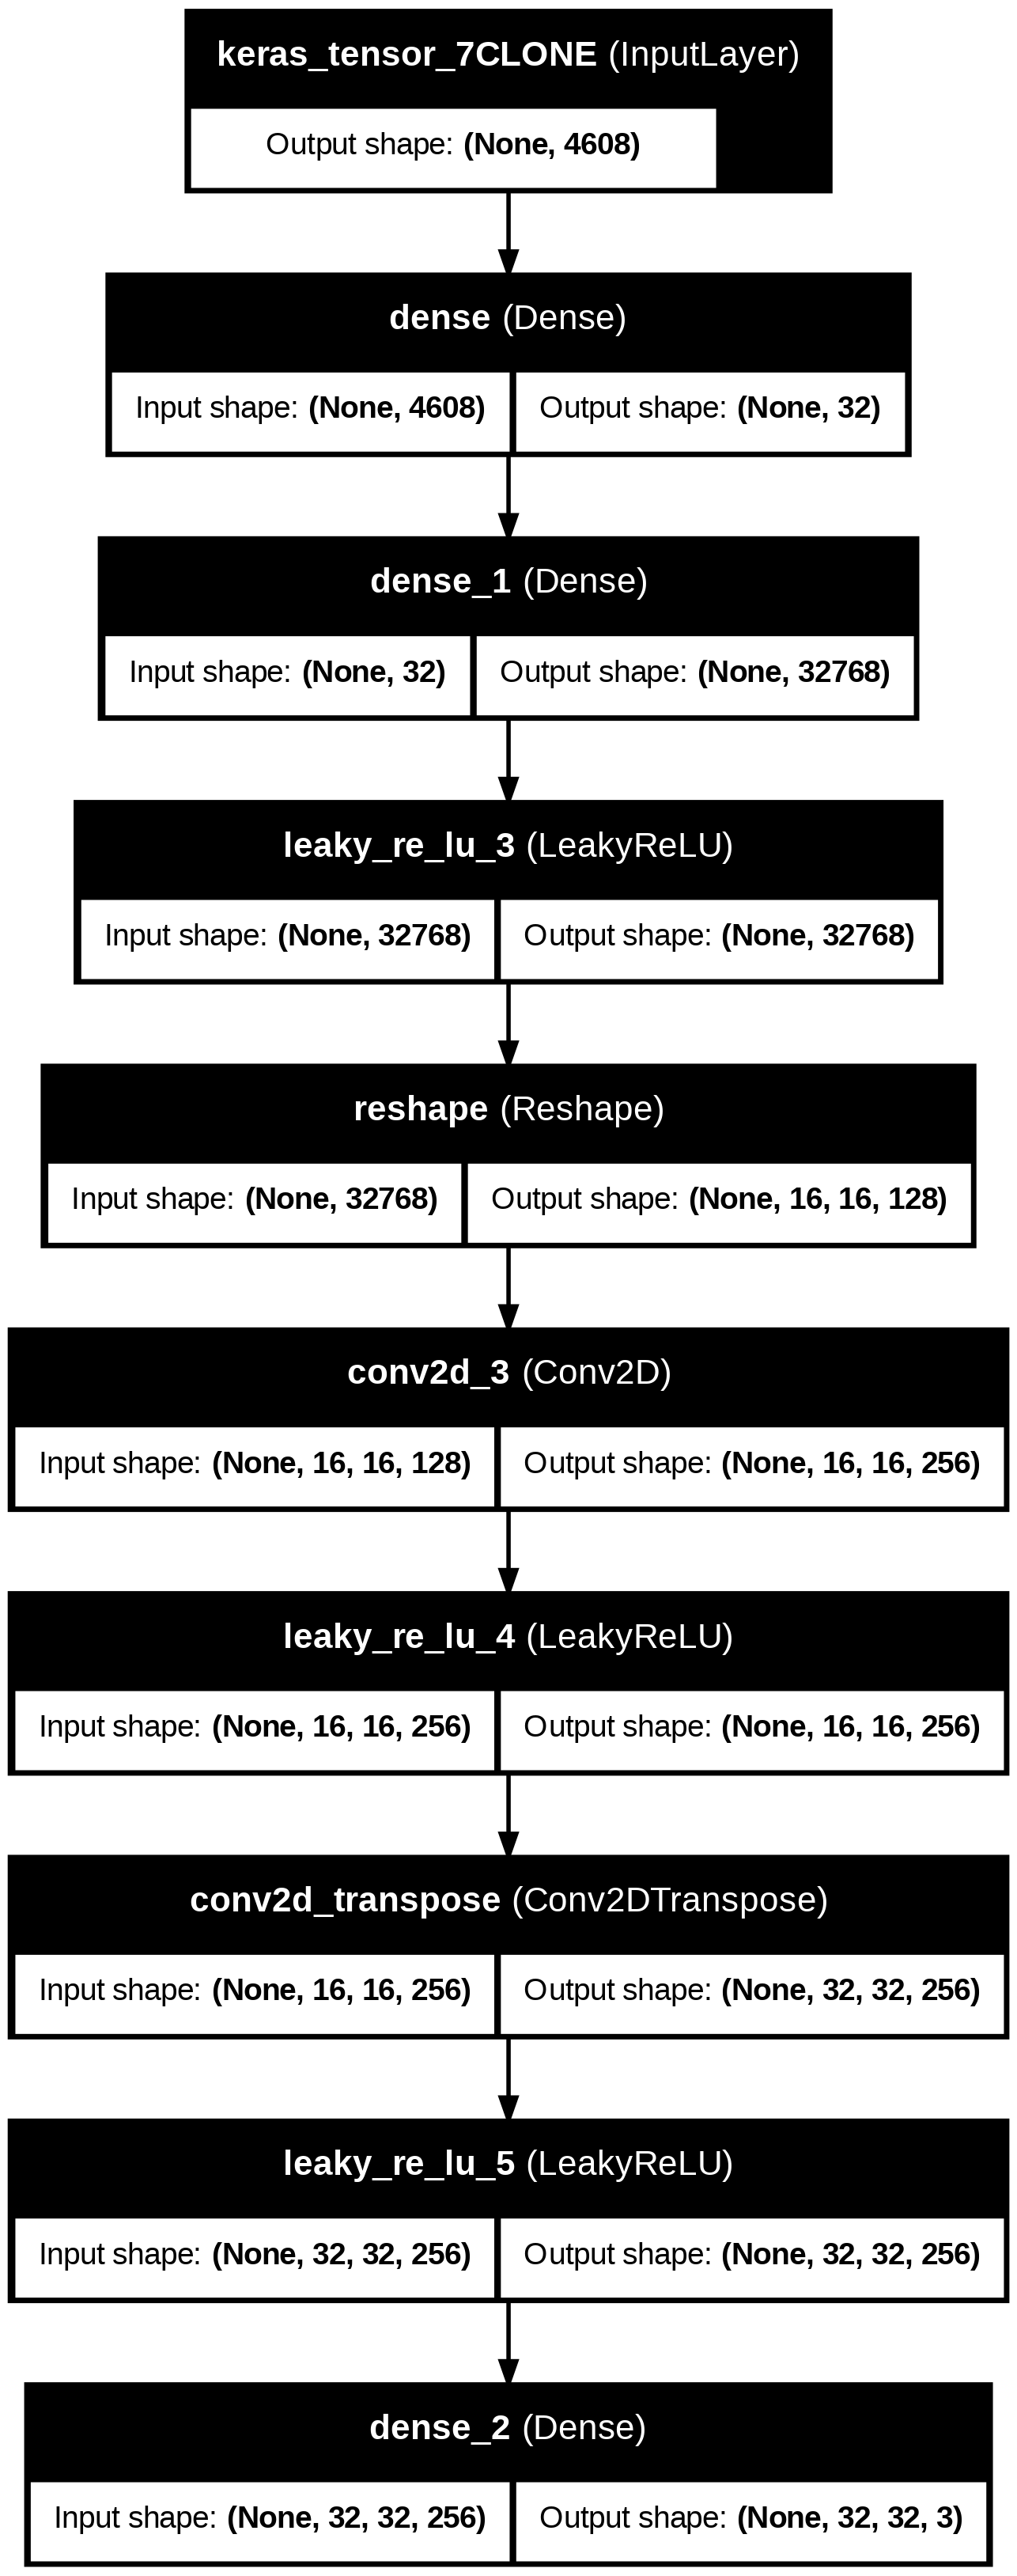

In [2]:
from keras.utils import plot_model

# Assuming your autoencoder model is named 'autoencoder'
# Extract the decoder part of the model
decoder_input = autoencoder.layers[-9].input  # Input to the decoder (latent space)
decoder_output = autoencoder.output  # Output of the decoder

decoder = keras.models.Model(decoder_input, decoder_output)

# Visualize the decoder structure
plot_model(autoencoder, to_file='encoder_structure.png', show_shapes=True, show_layer_names=True)
plot_model(decoder, to_file='decoder_structure.png', show_shapes=True, show_layer_names=True)

Here is some code to load the data and display images.

In [3]:
# Load CIFAR10 data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Select frog images (class 6)
x_train = x_train[y_train.flatten() == 6]
x_test = x_test[y_test.flatten() == 6]

# Normalize data
x_train = x_train.reshape(
    (x_train.shape[0],) + (height, width, channels)).astype('float32') / 255.
x_test = x_test.reshape(
    (x_test.shape[0],) + (height, width, channels)).astype('float32') / 255.


import matplotlib.pyplot as plt

# input a tensor of shape (num_images, x_size, y_size, channels)
# channels is 1 for greyscale and 3 for color images
def show_images(images):
  # Display tiled images
  n_x = np.int(np.sqrt(images.shape[0]))
  n_y = np.int(np.ceil(images.shape[0]/n_x))
  tile_x = images.shape[1]
  tile_y = images.shape[2]
  figure = np.zeros((tile_x * n_x, tile_y * n_y, images.shape[3]))

  for i in range(n_x):
    for j in range(n_y):
      cur_ind = i+n_x*j
      if (cur_ind >= images.shape[0]):
        break
      cur_image = images[cur_ind, :,:,:]
      figure[i * tile_x: (i + 1) * tile_x,
         j * tile_y: (j + 1) * tile_y] = cur_image

  plt.figure(figsize=(n_x, n_y))
  plt.imshow(np.squeeze(figure))
  ax = plt.gca()
  ax.grid(b=None)

  plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## The discriminator


Then, we develop a `discriminator` model, that takes as input a candidate image (real or synthetic) and classifies it into one of two
classes, either "generated image" or "real image that comes from the training set".

In [4]:
discriminator_input = layers.Input(shape=(height, width, channels))

# discriminator
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x=  layers.Dropout(0.4)(x)
# Your discriminator should end with the final binary classification layer:
x = layers.Dense(1, activation='sigmoid')(x)

# Your discriminator should end with the final binary classification layer:

discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()

# To stabilize training, we use learning rate decay
# and gradient clipping (by value) in the optimizer.
discriminator_optimizer = keras.optimizers.RMSprop(learning_rate=0.0008, clipvalue=1.0, decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 790,913 (3.02 MB)

 Trainable params: 790,913 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


## The adversarial network

Adversarial network (AN) that chains the autoencoder and the discriminator. This will move the autoencoder in a direction that improves its ability to fool the discriminator while still reproducing its input.

The AN is meant to be trained with labels that are always "these are real images", so the weights of `autoencoder` will be updated to make `discriminator` more likely to predict "real" when looking at fake images. Very importantly

The discriminator to be frozen during training (non-trainable): its weights will not be updated when training `gan`. If the discriminator weights could be updated during this process, then we would be training the discriminator to always predict "real", which is not what we want!  

Note: Setting nontrainable weights may give a warning about a mismatch between trainable and nontrainable weights, but you may ignore that.  

You will need to set up your model to have a loss function that is a weighted sum of the mse on the autoencoder and the binary cross entropy from the discriminator.   The link in the introduction gives information about how to do that.  



In [5]:
# Set discriminator weights to non-trainable
# (will only apply to the `gan` model)
discriminator.trainable = False

# Set up the gan to output both the image and the real/fake value from the discriminator
# See https://keras.io/getting-started/functional-api-guide/#multi-input-and-multi-output-models
gan_input = keras.Input(shape=(height, width, channels,))
gan_output= [autoencoder(gan_input),discriminator(autoencoder(gan_input))]

gan = keras.models.Model(gan_input,gan_output)

gan_optimizer = keras.optimizers.RMSprop(learning_rate=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer,
            # your code here to set up the loss function
              loss={'functional': 'mse', 'functional_2': 'binary_crossentropy'},
              loss_weights={'functional': 0.8, 'functional_2': 0.2}
           )



In [6]:
print(gan.output_names)

ListWrapper(['functional', 'functional_2'])


## Training AN

Now we can start training. To recapitulate, this is schematically what the training loop looks like:

```
for each epoch:
    * Draw a batch of training images
    * Reconstruct images with `autoencoder`
    * Mix the generated images with real ones.
    * Train `discriminator` using these mixed images, with corresponding targets, either "real" (for the real images) or "fake" (for the generated images).
    * Draw new random images.
    * Train `gan` using these random images, with targets that all say "these are real images". This will update the weights of the autoencoder (only, since discriminator is frozen inside `an`) to move them towards getting the discriminator to predict "these are real images" for generated images, i.e. this trains the autoencoder to fool the discriminator.
```

The code below does most of this.  You'll need to set up the training on batches.  You should also find a way to get and plot the validation loss - the loss on the test data.  This is not included below.  

In [ ]:

batch_size = 128
num_epochs = 50

print('Number of epochs = ' + str(num_epochs))

adv_loss = np.zeros((num_epochs, 3))
val_adv_loss = np.zeros((num_epochs, 3))
disc_loss = np.zeros((num_epochs, 1))

max_ind = x_train.shape[0]
max_test_ind = x_test.shape[0]
# Start training loop
start = 0
epoch = 0
while epoch < num_epochs:

    if (start == 0):
        cur_perm = np.random.permutation(max_ind)
        test_perm= np.random.permutation(max_test_ind)
    # Sample random training images
    stop = start + batch_size
    random_images = x_train[cur_perm[start:stop]]

    # Decode them to reconstructed images
    generated_images = autoencoder.predict(random_images)

    # Combine them with real images
    real_images = x_train[start: stop]
    combined_images = np.concatenate([generated_images, real_images])

    # Assemble labels discriminating real from fake images
    labels = np.concatenate([0.95*np.ones((batch_size, 1)),
                             np.zeros((batch_size, 1))])  # 0=real, 1=fake
    # Add random noise to the labels - important trick!
    labels += 0.05 * np.random.random(labels.shape)

    # Train the discriminator
    d_loss = discriminator.train_on_batch(combined_images, labels)

    # Assemble labels that say "all real images"
    misleading_targets = np.zeros((batch_size, 1))

    # Train the generator (via the AN model,
    # where the discriminator weights are frozen)
    a_loss = gan.train_on_batch(random_images,
                                [random_images,misleading_targets]# Add code to include training data that includes both random_images and misleading_targets
                               )

    start += batch_size
    if start > len(x_train) - batch_size:
        start = 0

        # Print metrics
        print('discriminator loss at epoch %s: %s' % (epoch, d_loss))
        print('adversarial loss at epoch %s: %s' % (epoch, a_loss))
        random_images=x_test[test_perm[start:start+batch_size]]
        true_targets=np.zeros((batch_size,1))
        adv_loss[epoch,:] = a_loss
        disc_loss[epoch,:] = d_loss

        # Calculate and save the validation loss (mse on image only)
        val_adv_loss[epoch,:] = gan.test_on_batch(random_images,[random_images,misleading_targets])
       # print('validation adversarial loss at epoch %s: %s' % (epoch, val_adv_loss))
        epoch += 1



Number of epochs = 50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━

discriminator loss at epoch 4: 0.69470435
adversarial loss at epoch 4: [array(0.69470435, dtype=float32), array(0.69470435, dtype=float32), array(0.69470435, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

discriminator loss at epoch 5: 0.6949027
adversarial loss at epoch 5: [array(0.6949027, dtype=float32), array(0.6949027, dtype=float32), array(0.6949027, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/

Display a few reconstructed images and the training plots:

In [ ]:
import numpy as np

def show_images(images):
  # Display tiled images
  n_x = int(np.sqrt(images.shape[0])) # Changed np.int to int
  n_y = int(np.ceil(images.shape[0]/n_x)) # Changed np.int to int
  tile_x = images.shape[1]
  tile_y = images.shape[2]

  # Initialize the display grid
  display_grid = np.zeros((n_y * tile_y, n_x * tile_x, images.shape[3]))

  # Populate the grid with images
  k = 0
  for i in range(n_y):
      for j in range(n_x):
          if k >= images.shape[0]:
              break
          display_grid[i * tile_y:(i + 1) * tile_y, j * tile_x:(j + 1) * tile_x] = images[k]
          k += 1

  # Display the grid
  plt.figure(figsize=(10, 10))
  plt.imshow(display_grid)
  plt.axis('off')
  plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


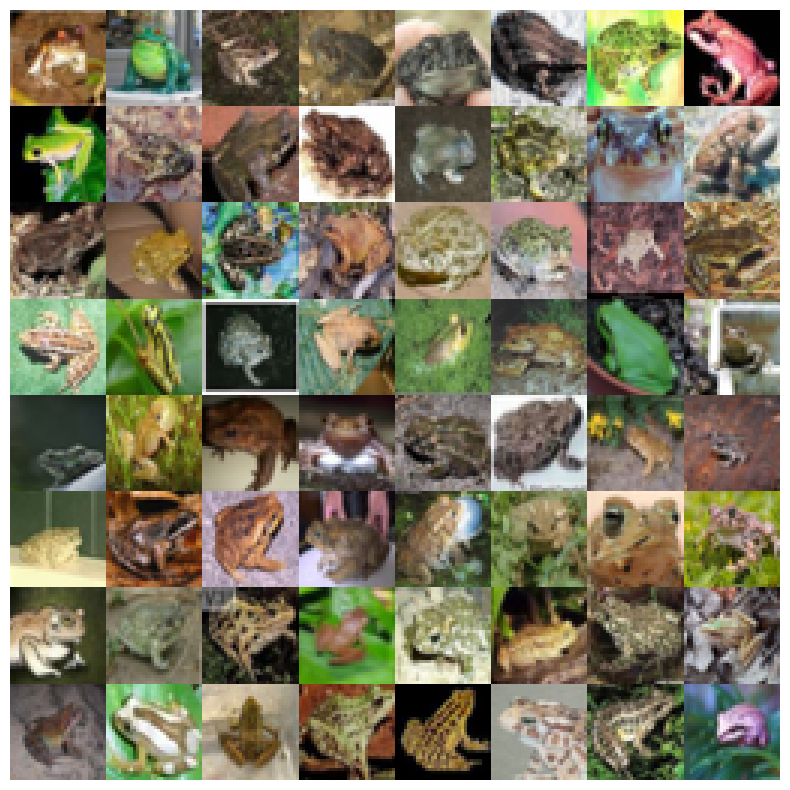

In [ ]:
ae_images, discrim = gan.predict(x_train[0:64])
show_images(ae_images)
show_images(x_train[0:64])

In [1]:
loss = adv_loss[:,1]  # Set up so this is mse on the images
val_loss = val_adv_loss[:,1]
epochs = range(num_epochs)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()



NameError: name 'adv_loss' is not defined